In [118]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
filepath = "/content/data.csv"
data = pd.read_csv(filepath)

In [120]:
data.head()

,Age group:,Education status:,Work status:,How do you travel to work/university?,"On average, how long does it take you to travel to work/university?",How engaged do you feel with the issue of climate change?,Do you know what a carbon footprint is?,How aware are you of your own carbon footprint?,How do you currently measure your own carbon footprint?,"What sources of information do you use, if any, to measure your carbon footprint?",Do you feel having more information about your carbon footprint would be useful?,Would having more information about your carbon footprint be likely to change your habits?,"What kind of motivation, if any, would you need in order to change one of your habits for a more environmentally friendly one?","How have you tried to reduce your carbon footprint, if at all?",How much do you care about trying to reduce your carbon footprint?,What do you consider to be the hardest part about trying to reduce your carbon footprint?,Have you tried to encourage others to reduce their carbon footprint?,Data Protection Agreement
0,18–22,In full-time education,Not working at all,Metro,More than an hour,4,Yes,2,1,None,5,Maybe,An app which gives me reminders of what I coul...,I have not tried to reduce my carbon footprint,5,Effort of it ngl,No,I agree
1,18–22,In full-time education,Part-time,Metro,More than an hour,3,Yes,1,1,None,3,Maybe,That me as a person changing something would a...,I have not tried to reduce my carbon footprint,3,I don't know what I could change,No,I agree
2,18–22,In full-time education,Not working at all,Metro,Less than an hour,3,Yes,2,1,None,5,Maybe,Knowing where to start.,Changed how I travel,4,Not knowing where to start.,No,I agree
3,18–22,In full-time education,Part-time,Metro,More than an hour,2,Yes,1,1,None,4,Yes,Monetary,I have not tried to reduce my carbon footprint,4,Reducing energy consumption,No,I agree
4,18–22,In full-time education,Not working at all,Metro,More than an hour,2,No,1,2,None,2,No,enviromint,no,2,what is carbon footprint?,No,I agree


In [121]:
# Only responses which agreed were collected, so this column is not needed
data.drop(columns=['Data Protection Agreement'], inplace=True)

# Rename columns from original questions to names that are easier to work with
data.rename(columns={
    'Age group:':'age_group',
    'Education status:':'education',
    'Work status:':'working',
    'How do you travel to work/university?':'travel_transport',
    'On average, how long does it take you to travel to work/university?':'average_travel_duration',
    'How engaged do you feel with the issue of climate change?':'climate_change_engagement',
    'Do you know what a carbon footprint is?':'carbon_footprint_definition_knowledge',
    'How aware are you of your own carbon footprint?':'carbon_footprint_awareness',
    'How do you currently measure your own carbon footprint?':'carbon_footprint_rating',
    'What sources of information do you use, if any, to measure your carbon footprint?':'carbon_footprint_sources',
    'Do you feel having more information about your carbon footprint would be useful?':'carbon_footprint_info_useful',
    'Would having more information about your carbon footprint be likely to change your habits?':'carbon_footprint_info_change_habits',
    'What kind of motivation, if any, would you need in order to change one of your habits for a more environmentally friendly one?':'habit_change_motivation',
    'How have you tried to reduce your carbon footprint, if at all?':'carbon_footprint_reduction_methods',
    'How much do you care about trying to reduce your carbon footprint?':'carbon_footprint_reduction_desire',
    'What do you consider to be the hardest part about trying to reduce your carbon footprint?':'carbon_footprint_reduction_difficulties',
    'Have you tried to encourage others to reduce their carbon footprint?':'encouraged_others_to_reduce_carbon'
}, inplace=True)

data.carbon_footprint_reduction_difficulties = data.carbon_footprint_reduction_difficulties.str.lower()
data.habit_change_motivation = data.habit_change_motivation.str.lower()

data.head()

,age_group,education,working,travel_transport,average_travel_duration,climate_change_engagement,carbon_footprint_definition_knowledge,carbon_footprint_awareness,carbon_footprint_rating,carbon_footprint_sources,carbon_footprint_info_useful,carbon_footprint_info_change_habits,habit_change_motivation,carbon_footprint_reduction_methods,carbon_footprint_reduction_desire,carbon_footprint_reduction_difficulties,encouraged_others_to_reduce_carbon
0,18–22,In full-time education,Not working at all,Metro,More than an hour,4,Yes,2,1,None,5,Maybe,an app which gives me reminders of what i coul...,I have not tried to reduce my carbon footprint,5,effort of it ngl,No
1,18–22,In full-time education,Part-time,Metro,More than an hour,3,Yes,1,1,None,3,Maybe,that me as a person changing something would a...,I have not tried to reduce my carbon footprint,3,i don't know what i could change,No
2,18–22,In full-time education,Not working at all,Metro,Less than an hour,3,Yes,2,1,None,5,Maybe,knowing where to start.,Changed how I travel,4,not knowing where to start.,No
3,18–22,In full-time education,Part-time,Metro,More than an hour,2,Yes,1,1,None,4,Yes,monetary,I have not tried to reduce my carbon footprint,4,reducing energy consumption,No
4,18–22,In full-time education,Not working at all,Metro,More than an hour,2,No,1,2,None,2,No,enviromint,no,2,what is carbon footprint?,No


In [122]:
print("Total Row Count: {0} \nTotal Column Count: {1}".format(data.shape[0], data.shape[1]))

Total Row Count: 86 
Total Column Count: 17


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   age_group                                86 non-null     object
 1   education                                86 non-null     object
 2   working                                  86 non-null     object
 3   travel_transport                         86 non-null     object
 4   average_travel_duration                  86 non-null     object
 5   climate_change_engagement                86 non-null     int64 
 6   carbon_footprint_definition_knowledge    86 non-null     object
 7   carbon_footprint_awareness               86 non-null     int64 
 8   carbon_footprint_rating                  86 non-null     int64 
 9   carbon_footprint_sources                 86 non-null     object
 10  carbon_footprint_info_useful             86 non-null     int64 


In [124]:
data.isnull().sum()

age_group                                  0
education                                  0
working                                    0
travel_transport                           0
average_travel_duration                    0
climate_change_engagement                  0
carbon_footprint_definition_knowledge      0
carbon_footprint_awareness                 0
carbon_footprint_rating                    0
carbon_footprint_sources                   0
carbon_footprint_info_useful               0
carbon_footprint_info_change_habits        0
habit_change_motivation                    0
carbon_footprint_reduction_methods         0
carbon_footprint_reduction_desire          0
carbon_footprint_reduction_difficulties    1
encouraged_others_to_reduce_carbon         0
dtype: int64

In [125]:
data.dropna(axis=0, inplace=True);

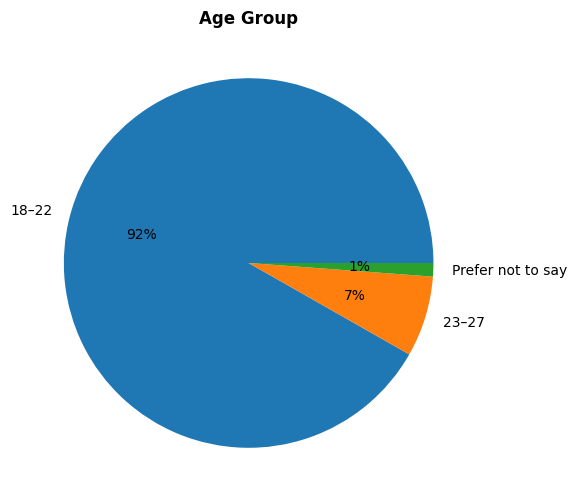

In [126]:
_,ax = plt.subplots(figsize=(8,6))
data.age_group.value_counts().plot(kind='pie', ax=ax, autopct='%.0f%%')
ax.set_title('Age Group', weight='bold')
ax.set_ylabel(None);

In [127]:
data.education.value_counts()

In full-time education    85
Name: education, dtype: int64

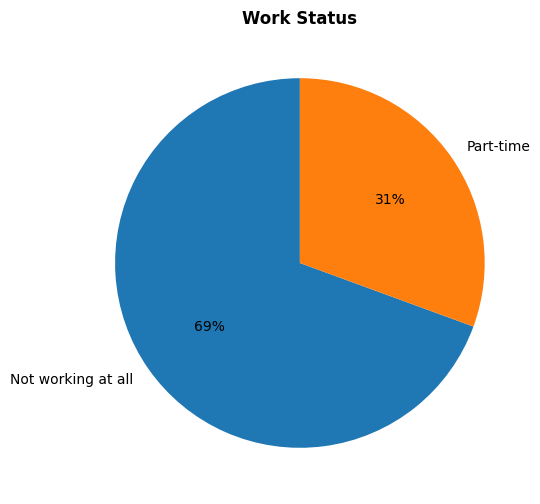

In [128]:
_,ax = plt.subplots(figsize=(8,6))
data.working.value_counts().plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)
ax.set_title('Work Status', weight='bold')
ax.set_ylabel(None);

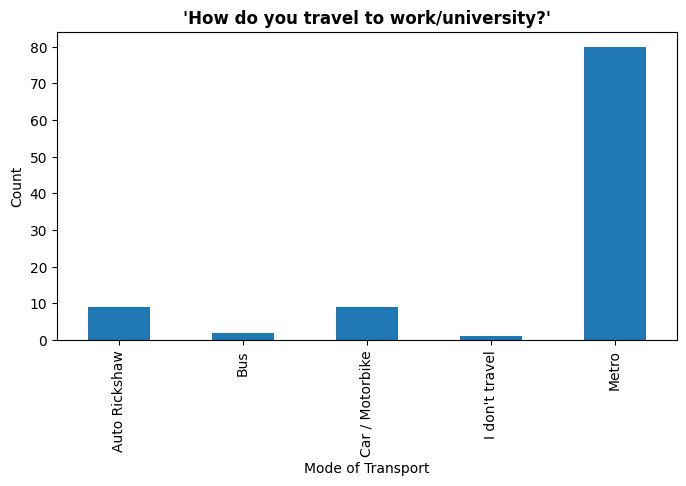

In [129]:
mode_of_transport = data.travel_transport.str.get_dummies(';').astype('bool').sum()

_,ax = plt.subplots(figsize=(8,4))
mode_of_transport.plot(ax=ax, kind="bar")

ax.set_title('\'How do you travel to work/university?\'', weight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Mode of Transport');

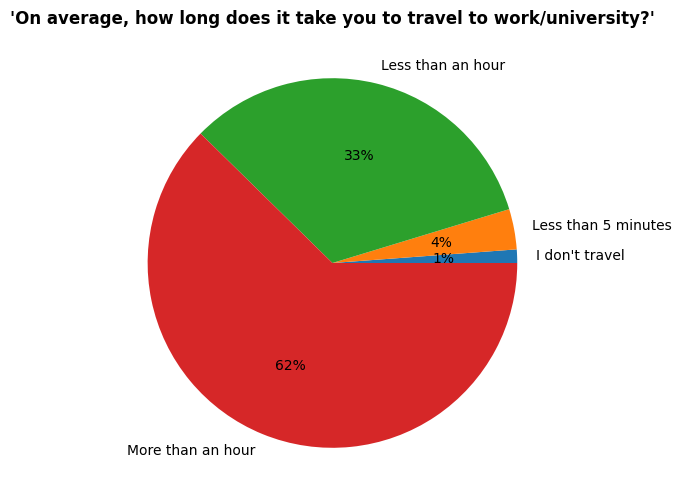

In [130]:
_,ax = plt.subplots(figsize=(8,6))
data.average_travel_duration.value_counts().sort_values().plot(kind='pie', autopct='%.0f%%', ax=ax)
ax.set_title('\'On average, how long does it take you to travel to work/university?\'', weight='bold')
ax.set_ylabel(None);

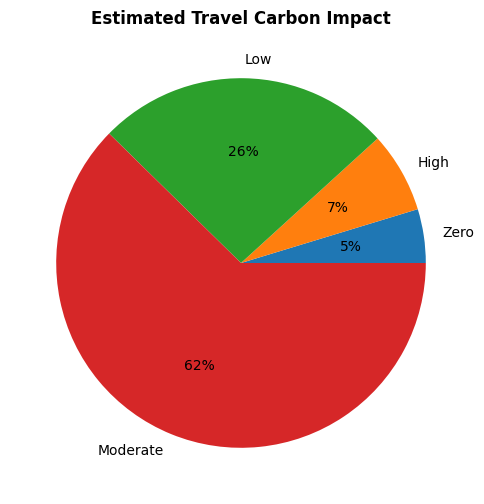

In [131]:
conditions = [
    # High impact
    (data.average_travel_duration == 'Less than an hour') & (data.travel_transport.str.contains('Car / Motorbike')),
    # Moderate impact
    (data.average_travel_duration == 'More than an hour') & (data.travel_transport.str.contains('Metro') | data.travel_transport.str.contains('Auto Rickshaw')),
    # Moderate impact
    (data.average_travel_duration == 'Less than 15 minutes') & (data.travel_transport.str.contains('Car / Motorbike')),
    # Low impact
    (data.average_travel_duration == 'Less than an hour') & (data.travel_transport.str.contains('Metro') | data.travel_transport.str.contains('Auto Rickshaw')),
    # Zero impact
    (data.travel_transport.str.contains('I don\'t travel'))]
choices = ['High', 'Moderate', 'Moderate', 'Low', 'Zero']
data['estimated_carbon_impact'] = np.select(conditions, choices, default='Zero')

_,ax = plt.subplots(figsize=(8,6))
data['estimated_carbon_impact'].value_counts().sort_values().plot(kind='pie', autopct='%.0f%%', ax=ax)
ax.set_title('Estimated Travel Carbon Impact', weight='bold')
ax.set_ylabel(None);


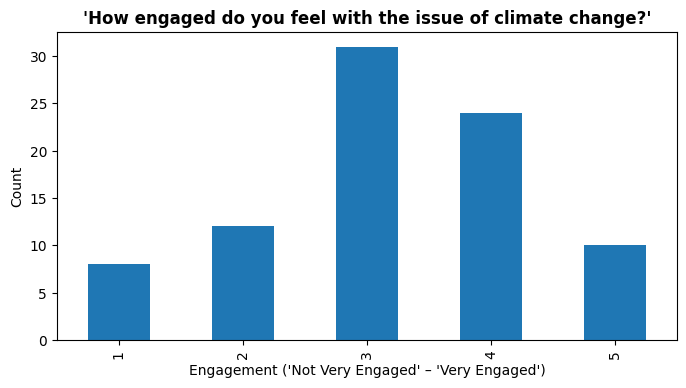

In [132]:
climate_change_engagement = data.climate_change_engagement.value_counts().sort_index()

_,ax = plt.subplots(figsize=(8,4))
climate_change_engagement.plot(ax=ax, kind="bar")

ax.set_title('\'How engaged do you feel with the issue of climate change?\'', weight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Engagement (\'Not Very Engaged\' – \'Very Engaged\')');

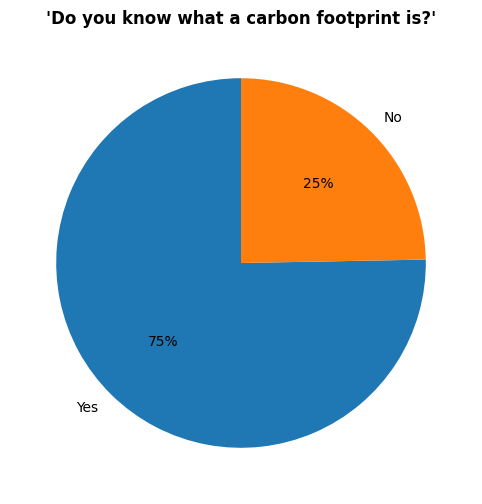

In [133]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_definition_knowledge.value_counts().plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)
ax.set_title('\'Do you know what a carbon footprint is?\'', weight='bold')
ax.set_ylabel(None);

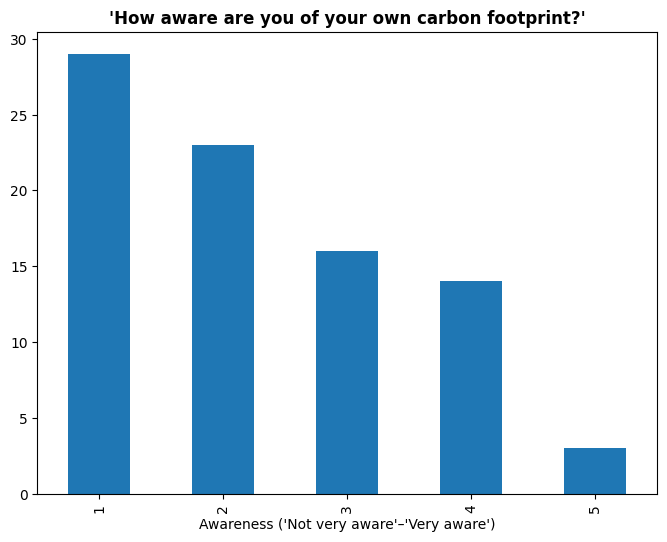

In [134]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_awareness.value_counts().plot(kind='bar', ax=ax)
ax.set_title('\'How aware are you of your own carbon footprint?\'', weight='bold');
ax.set_xlabel('Awareness (\'Not very aware\'–\'Very aware\')');

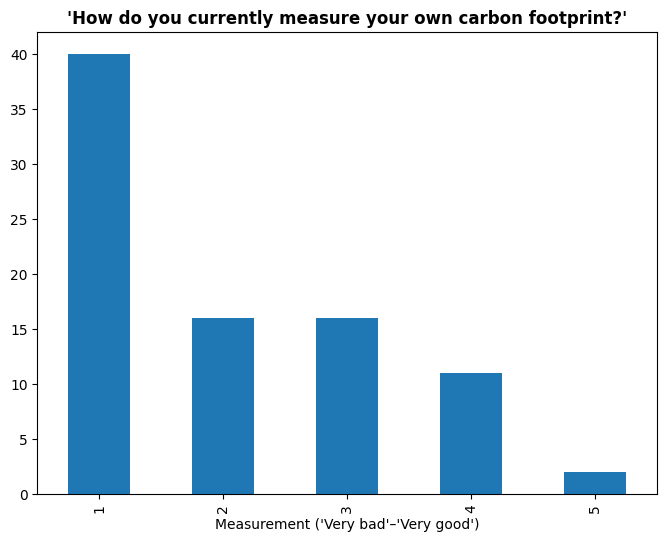

In [135]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_rating.value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title('\'How do you currently measure your own carbon footprint?\'', weight='bold');
ax.set_xlabel('Measurement (\'Very bad\'–\'Very good\')');

In [136]:
print('What sources of information do you use, if any, to measure your carbon footprint?')
data.carbon_footprint_sources.value_counts()

What sources of information do you use, if any, to measure your carbon footprint?


None                                82
news / internet articles             1
Smart meter                          1
wwf carbon footprint calculator      1
Name: carbon_footprint_sources, dtype: int64

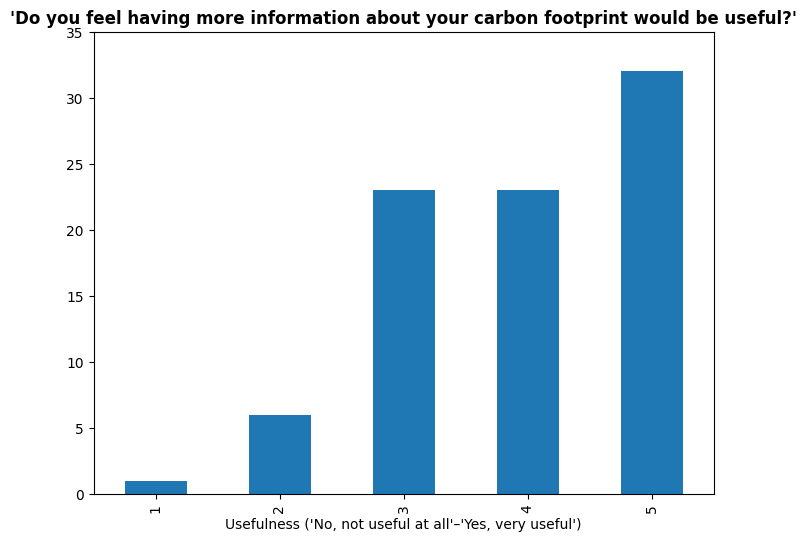

In [137]:
carbon_footprint_info_useful_value_counts = data.carbon_footprint_info_useful.value_counts().sort_index().reindex(range(1,6), fill_value=0)

_,ax = plt.subplots(figsize=(8,6))
carbon_footprint_info_useful_value_counts.plot(kind='bar', ax=ax, ylim=(0, 35))

ax.set_title('\'Do you feel having more information about your carbon footprint would be useful?\'', weight='bold');
ax.set_xlabel('Usefulness (\'No, not useful at all\'–\'Yes, very useful\')');

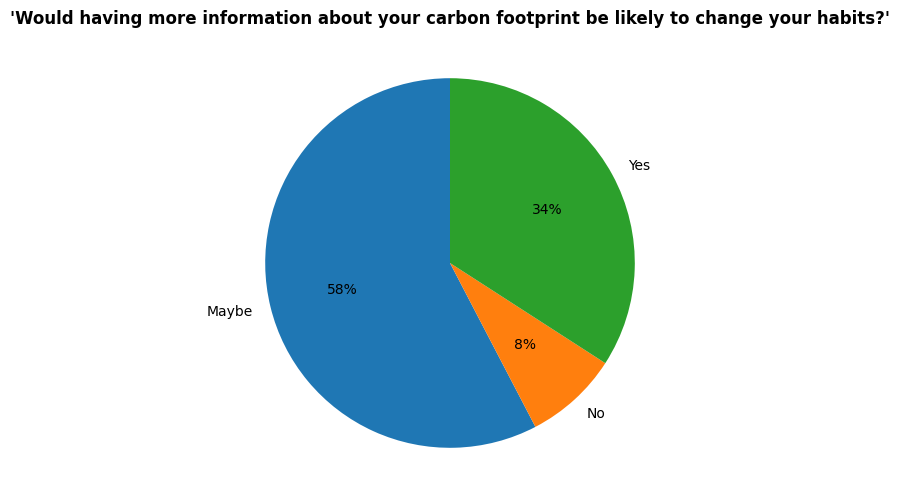

In [138]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_info_change_habits.value_counts().sort_index().plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)
ax.set_title('\'Would having more information about your carbon footprint be likely to change your habits?\'', weight='bold')
ax.set_ylabel(None);

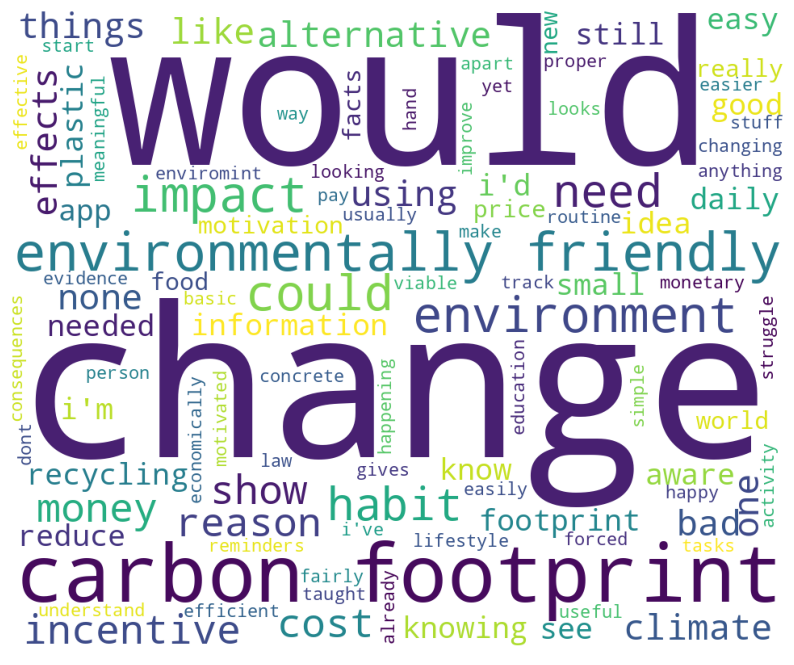

In [139]:
from wordcloud import WordCloud
import nltk as nlp

habit_change_motivation_responses = data.habit_change_motivation.values
habit_change_motivation_responses = map(lambda response: response, habit_change_motivation_responses)

response_filters = ['.', 'yes', 'idk']
habit_change_motivation_responses = list(filter(lambda x: x not in response_filters, habit_change_motivation_responses))

flatten = lambda l: [item for sublist in l for item in sublist]
words = flatten([response.split() for response in habit_change_motivation_responses])

porter_stemmer = nlp.PorterStemmer()
normalised_words = [porter_stemmer.stem(word) for word in words]

stopwords = nlp.corpus.stopwords.words('english') + ['an', 'as', 'a', 'i', 'it\s', 'is', 'something', 'at', 'although', 'actually', 'bit']

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    width=960,
    height=800,
    random_state=42).generate(' '.join(words))

fig = plt.figure(1, figsize=(10, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

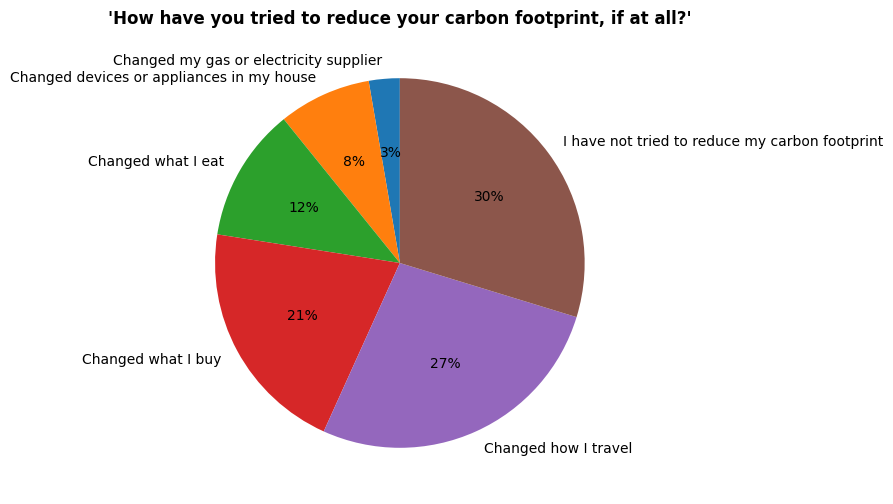

In [140]:
reduction_methods = data.carbon_footprint_reduction_methods.str.get_dummies(sep=';').sum().sort_values()
reduction_methods = reduction_methods.loc[reduction_methods > 1]

_,ax = plt.subplots(figsize=(8,6))

reduction_methods.plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)

ax.set_title('\'How have you tried to reduce your carbon footprint, if at all?\'', weight='bold')
ax.set_ylabel(None);

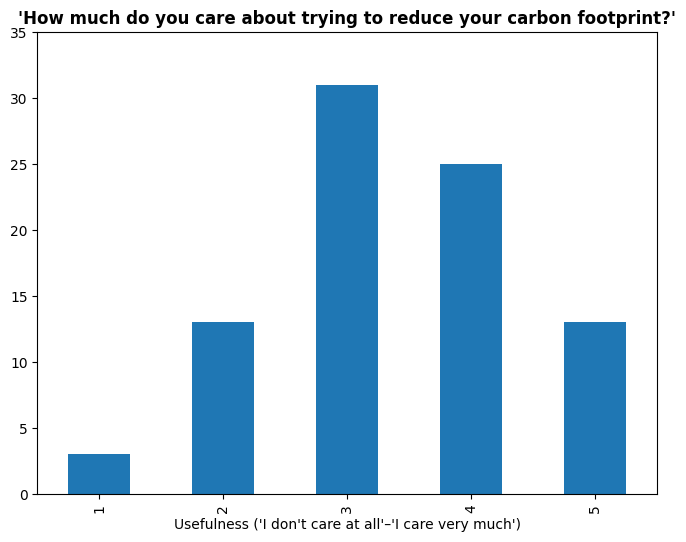

In [141]:
carbon_footprint_reduction_desire_counts = data.carbon_footprint_reduction_desire.value_counts().sort_index()

_,ax = plt.subplots(figsize=(8,6))
carbon_footprint_reduction_desire_counts.plot(kind='bar', ax=ax, ylim=(0, 35))

ax.set_title('\'How much do you care about trying to reduce your carbon footprint?\'', weight='bold');
ax.set_xlabel('Usefulness (\'I don\'t care at all\'–\'I care very much\')');

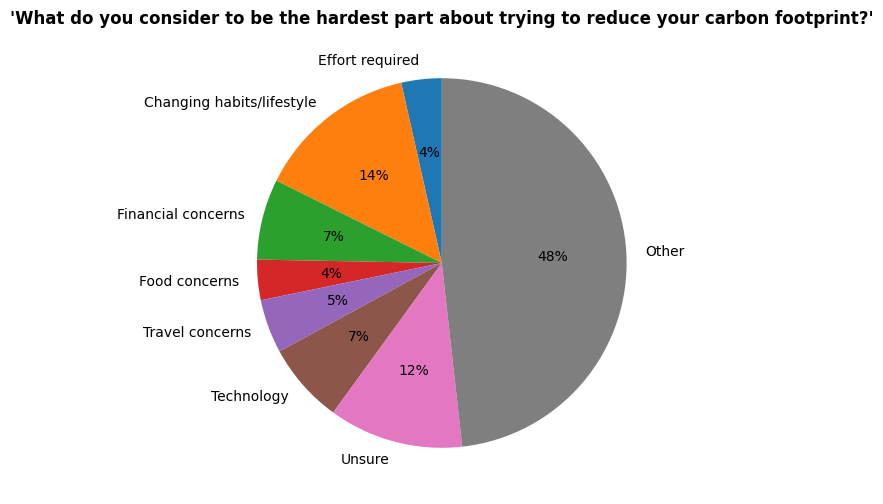

In [142]:
reduction_difficulties = data.carbon_footprint_reduction_difficulties.values

def count_responses_containing(words):
    return len(list(filter(lambda r: any(w in r for w in words), reduction_difficulties)))

effort_response_count = count_responses_containing(['effort'])
habit_response_count = count_responses_containing(['habit','lifestyle','day to day','day-to-day','daily'])
money_response_count = count_responses_containing(['cost','money'])
unsure_response_count =  count_responses_containing(['not know', 'dont know', 'don\'t know', 'no idea', 'not sure', 'knowing how'])
food_response_count = len(list(filter(lambda r: any(w in r.split() for w in ['food','eat','dairy']), reduction_difficulties)))
travel_response_count =  count_responses_containing(['travel','transport'])
tech_response_count =  count_responses_containing(['energy','power','technology','devices'])

all_response_count = len(reduction_difficulties)
other_response_count = all_response_count - sum([effort_response_count,habit_response_count,money_response_count,food_response_count,travel_response_count,tech_response_count,unsure_response_count])

sizes = [effort_response_count,habit_response_count,money_response_count,food_response_count,travel_response_count,tech_response_count,unsure_response_count,other_response_count]
labels = ['Effort required', 'Changing habits/lifestyle', 'Financial concerns', 'Food concerns', 'Travel concerns', 'Technology', 'Unsure', 'Other']

_,ax = plt.subplots(figsize=(8,6))
ax.pie(sizes, labels=labels, autopct='%0.0f%%', startangle=90)

ax.set_title('\'What do you consider to be the hardest part about trying to reduce your carbon footprint?\'', weight='bold')
ax.set_ylabel(None);

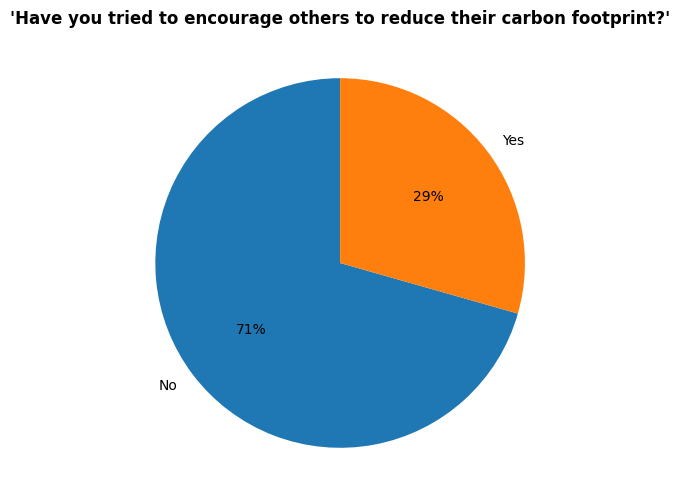

In [143]:
_,ax = plt.subplots(figsize=(8,6))
data.encouraged_others_to_reduce_carbon.value_counts().plot(kind='pie', startangle=90, autopct='%0.0f%%', ax=ax)
ax.set_title('\'Have you tried to encourage others to reduce their carbon footprint?\'', weight='bold')
ax.set_ylabel(None);

In [144]:
data.corr()

<ipython-input-144-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,climate_change_engagement,carbon_footprint_awareness,carbon_footprint_rating,carbon_footprint_info_useful,carbon_footprint_reduction_desire
climate_change_engagement,1.000000,0.287928,0.343901,0.314215,0.401074
carbon_footprint_awareness,0.287928,1.000000,0.174641,0.074674,0.210341
carbon_footprint_rating,0.343901,0.174641,1.000000,0.042159,0.140796
carbon_footprint_info_useful,0.314215,0.074674,0.042159,1.000000,0.532453
carbon_footprint_reduction_desire,0.401074,0.210341,0.140796,0.532453,1.000000


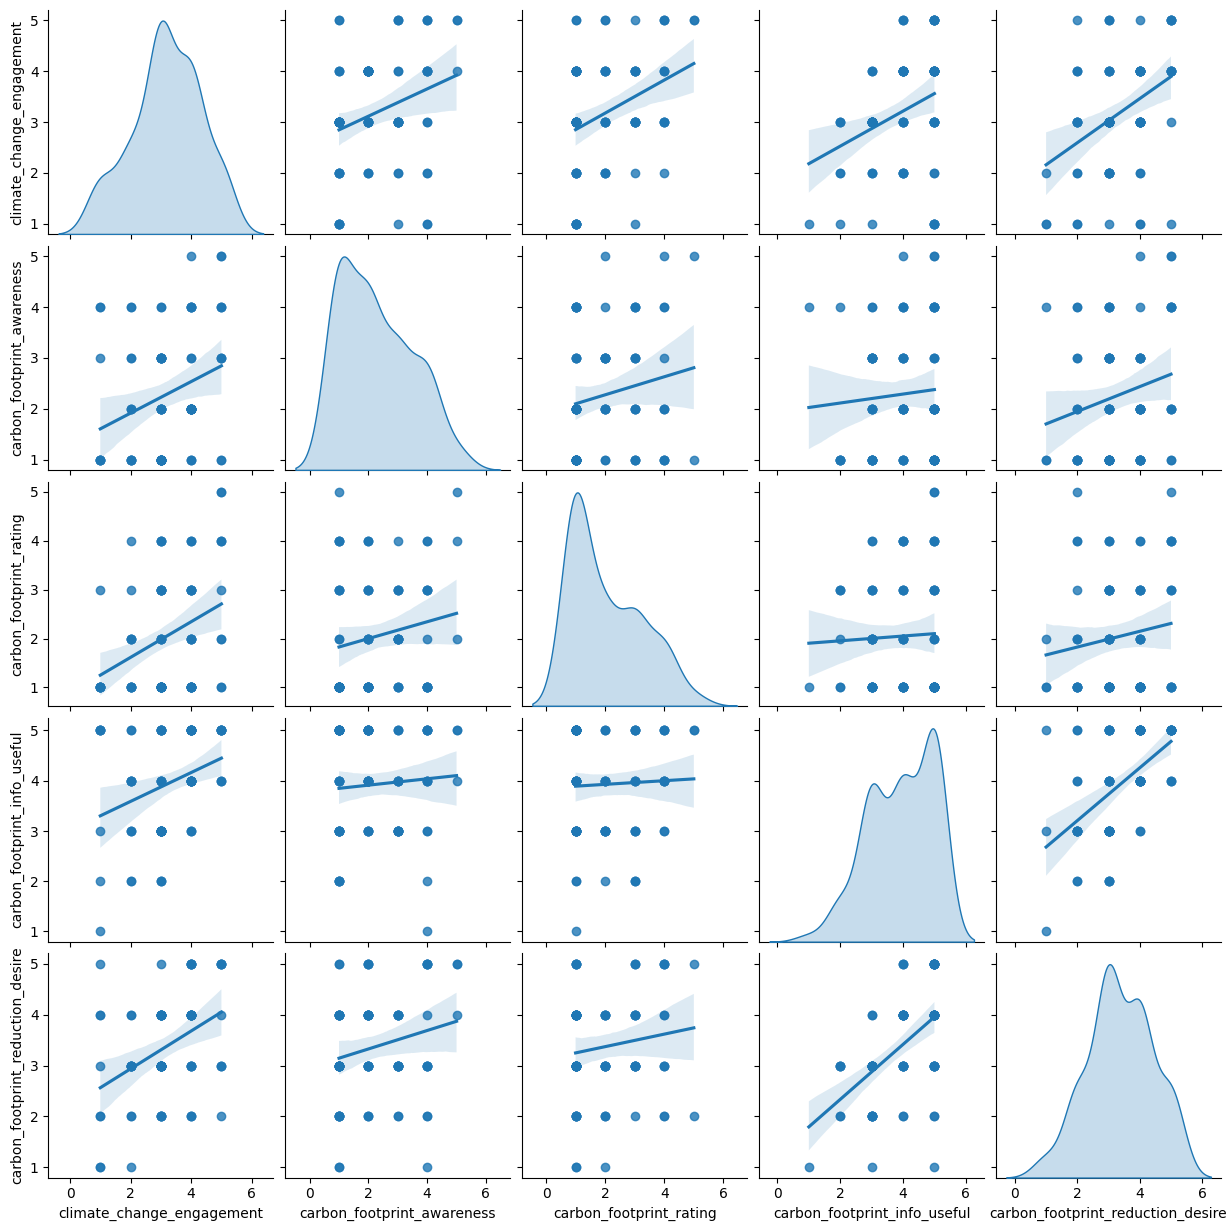

In [145]:
sns.pairplot(data, kind="reg", diag_kind="kde");

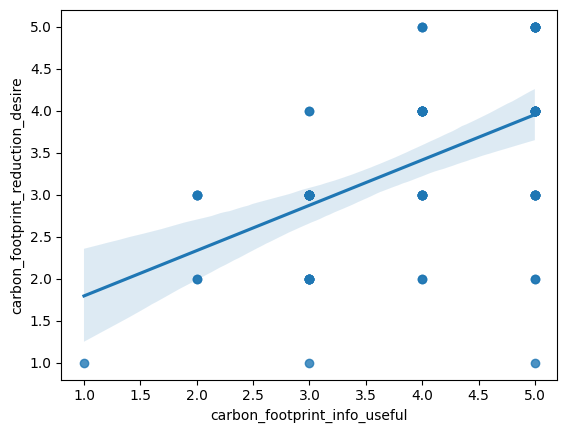

In [146]:
ax = sns.regplot(data=data, x='carbon_footprint_info_useful', y='carbon_footprint_reduction_desire')